In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df0 = pd.read_csv(r'all_v2.csv')

df0.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #чтобы были читаемы вещественные числа
df0.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000,5477006.000
mean,4422029.023,54.038,53.244,4307.141,1.949,6.215,11.399,1.726,53.918,10.628,3.945
std,21507519.155,4.623,20.748,3308.050,1.039,4.957,6.536,1.082,33.353,9.792,4.558
min,-2144967296.000,41.459,19.890,3.000,0.000,1.000,1.000,-2.000,0.070,0.010,1.000
25%,1950000.000,53.378,37.778,2661.000,1.000,2.000,5.000,1.000,38.000,7.000,1.000
50%,2990000.000,55.171,43.068,2922.000,2.000,5.000,10.000,2.000,48.020,9.700,1.000
75%,4802000.000,56.226,65.649,6171.000,3.000,9.000,16.000,2.000,63.130,12.700,11.000
max,2147483647.000,71.980,162.536,61888.000,5.000,39.000,39.000,10.000,7856.000,9999.000,11.000


In [4]:
df = df0.drop_duplicates()

In [5]:
df.drop('time', axis=1, inplace=True)
df["object_type"] = df["object_type"].apply(lambda x: 2 if x == 11 else x)
df['rooms'] = df["rooms"].apply(lambda x: 0 if x < 0 else x)    
df["price"] = df["price"].abs()

min_price = 800000
max_price = 50000000

df = df[(df["price"] <= max_price) & (df["price"] >= min_price)]

df.loc[df["level"] > df["levels"], "level"] = df["levels"]

df['level_to_levels'] = df['level'] / df['levels']

df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
#df['day'] = df['date'].dt.day

df = df.drop(['date'], axis = 1)

min_area = 10
max_area = 150

min_kitchen_area = 6
max_kitchen_area = 40

df = df[(df["area"] <= max_area) & (df["area"] >= min_area)]
df = df[(df["kitchen_area"] <= max_kitchen_area) & (df["kitchen_area"] >= min_kitchen_area)]
df['rooms'] = df['rooms'].replace(0, 1)

df['area_to_rooms'] = (df['area'] / df['rooms'])

C:\Users\Andrew\AppData\Local\Temp\ipykernel_27760\3890565903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('time', axis=1, inplace=True)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_27760\3890565903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["object_type"] = df["object_type"].apply(lambda x: 2 if x == 11 else x)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_27760\3890565903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

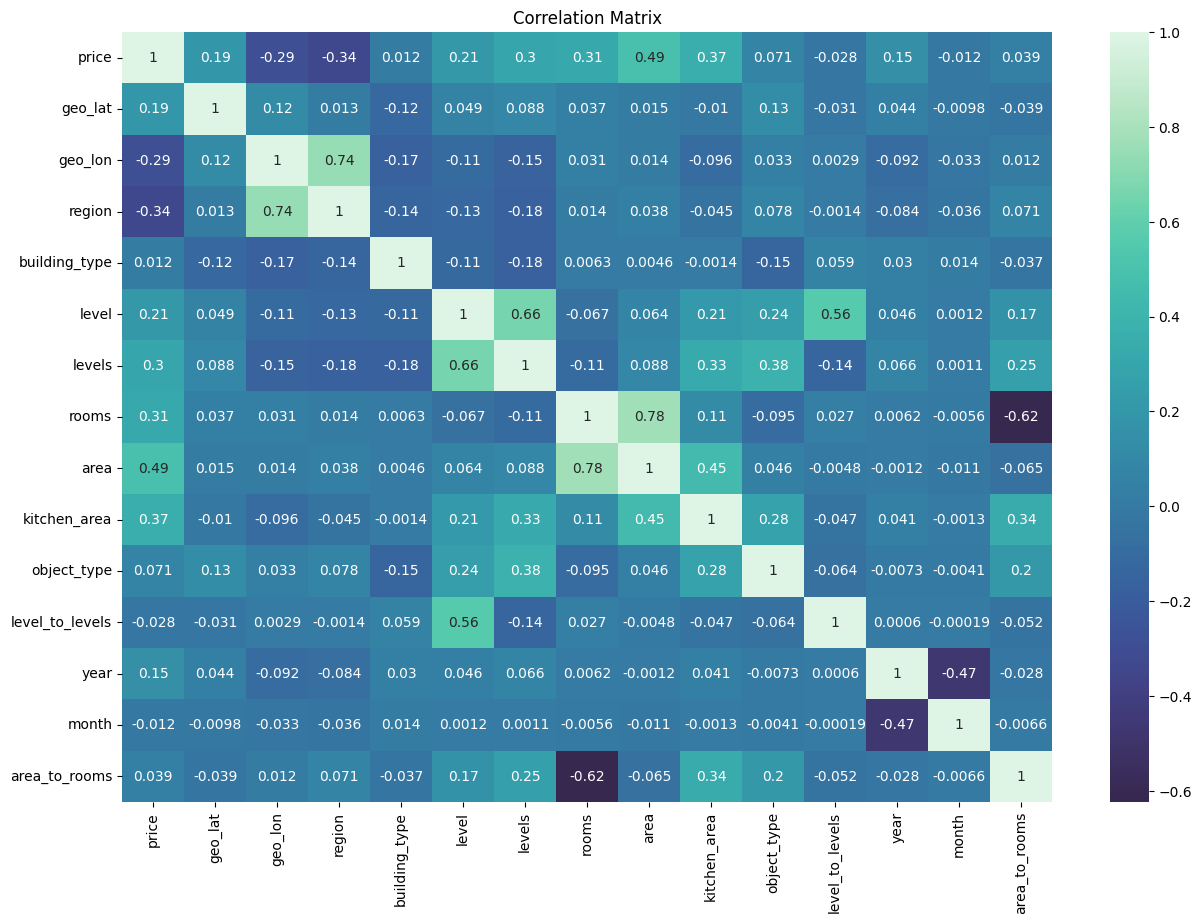

In [90]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), center=0, cmap='mako', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [6]:
region_name = {
    '2661': 'Санкт-Петербург',
    '3446': 'Ленинградская область', 
    '3': 'Москва',
    '81': 'Московская область',
    '2843': 'Краснодарский край',
    '2871': 'Нижегородская область',
    '3230': 'Ростовская область',
    '3106': 'Самарская область',
    '2922': 'Республика Татарстан',
    '2900': 'Ставропольский край',
    '2722': 'Республика Башкортостан',
    '6171': 'Свердловская область', 
    '4417': 'Республика Коми', 
    '5282': 'Челябинская область', 
    '5368': 'Иркутская область', 
    '5520': 'Пермский край', 
    '6817': 'Алтайский край',
    '9579': 'Республика Бурятия',
    '2604': 'Ярославская область',
    '1010': 'Удмуртская Республика',
    '7793': 'Псковская область',
    '13919': 'Республика Северная Осетия — Алания',
    '2860': 'Кемеровская область',
    '3019': 'Чувашская Республика',
    '4982': 'Республика Марий Эл',
    '9648': 'Кабардино-Балкарская Республика',
    '5241': 'Республика Мордовия',
    '3870': 'Красноярский край',
    '3991': 'Тюменская область',
    '2359': 'Республика Хакасия',
    '9654': 'Новосибирская область',
    '2072': 'Воронежская область',
    '8090': 'Республика Карелия',
    '4007': 'Республика Дагестан',
    '11171': 'Республика Саха (Якутия)',
    '10160': 'Забайкальский край',
    '7873, 6937': 'Республика Крым',
    '2594': 'Кировская область',
    '8509': 'Республика Калмыкия',
    '11416': 'Республика Адыгея',
    '11991': 'Карачаево-Черкесская Республика',
    '5178': 'Республика Тыва',
    '13913': 'Республика Ингушетия',
    '6309': 'Республика Алтай',
    '5952': 'Белгородская область',
    '6543': 'Архангельская область',
    '2880': 'Тверская область',
    '5993': 'Пензенская область',
    '2484': 'Ханты-Мансийский автономный округ',
    '4240': 'Липецкая область',
    '5789': 'Владимирская область',
    '14880': 'Ямало-Ненецкий автономный округ',
    '1491': 'Рязанская область',
    '2885': 'Чеченская Республика',
    '5794': 'Смоленская область',
    '2528': 'Саратовская область',
    '4374': 'Вологодская область',
    '4695': 'Волгоградская область',
    '2328': 'Калужская область',
    '5143': 'Тульская область',
    '2806': 'Тамбовская область',
    '14368': 'Мурманская область',
    '5736': 'Новгородская область',
    '7121': 'Курская область',
    '4086': 'Хабаровский край',
    '821': 'Брянская область',
    '10582': 'Астраханская область',
    '7896': 'Калининградская область',
    '8640': 'Омская область',
    '5703': 'Курганская область',
    '10201': 'Томская область',
    '4249': 'Ульяновская область',
    '3153': 'Оренбургская область',
    '4189': 'Костромская область',
    '2814': 'Орловская область',
    '13098': 'Камчатский край',
    '8894': 'Ивановская область',
    '7929': 'Амурская область',
    '16705': 'Магаданская область',
    '69': 'Еврейская автономная область',
    '4963': 'Приморский край',
    '1901': 'Сахалинская область',
    '61888': 'Ненецкий автономный округ'
}

In [7]:
df["region"] = df["region"].astype(str) # преобразуем в строку все значения

df['region_name'] = df['region'].map(region_name) 

df['region_name']

0                Санкт-Петербург
1             Московская область
2          Нижегородская область
4             Московская область
5             Московская область
                   ...          
5477001                   Москва
5477002                   Москва
5477003    Нижегородская область
5477004                   Москва
5477005                   Москва
Name: region_name, Length: 4771071, dtype: object

In [8]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
df_nn = df[df.region_name == 'Москва'].copy()
df_nn = df_nn.drop(columns=['region', 'region_name']).reset_index(drop=True)
#df_nn['area_to_rooms'] = df_nn['area_to_rooms'].apply(lambda x: f'{x:.4}')
df_nn['level_to_levels'] = df_nn['level_to_levels'].apply(lambda x: f'{x:.7}').astype(float)

df_nn.head(10)

,price,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,level_to_levels,year,month,area_to_rooms
0,4704280,55.621,37.431,2,1,25,1,31.700,6.000,2,0.040,2018,3,31.700
1,8000000,55.739,37.825,1,5,9,2,45.000,6.000,1,0.556,2018,3,22.500
2,11500000,55.799,37.738,1,14,16,3,64.900,8.000,1,0.875,2018,4,21.633
3,10200000,55.655,37.615,2,7,14,2,52.800,10.000,1,0.500,2018,4,26.400
4,11500000,55.701,37.507,1,14,17,1,42.000,12.000,1,0.824,2018,4,42.000
5,20900000,55.731,37.631,3,6,10,3,80.000,8.200,1,0.600,2018,5,26.667
6,12000000,55.627,37.592,1,4,9,3,64.900,7.000,1,0.444,2018,5,21.633
7,5750000,55.704,37.767,1,8,9,1,32.000,6.000,1,0.889,2018,6,32.000
8,11535000,55.724,37.741,1,15,24,3,80.900,14.000,1,0.625,2018,6,26.967
9,6990000,55.724,37.435,3,1,5,2,44.000,6.000,1,0.200,2018,7,22.000


In [10]:
df_nn.replace([np.inf, -np.inf], np.nan, inplace=True)

df_nn.dropna(subset=['level_to_levels'], how="all", inplace=True)
df_nn['level_to_levels']

0        0.040
1        0.556
2        0.875
3        0.500
4        0.824
          ... 
382772   0.500
382773   0.471
382774   0.531
382775   0.242
382776   0.435
Name: level_to_levels, Length: 382777, dtype: float64

In [35]:
X

,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,level_to_levels,year,month,area_to_rooms
0,55.621,37.431,2,1,25,1,31.700,6.000,2,0.040,2018,3,31.700
1,55.739,37.825,1,5,9,2,45.000,6.000,1,0.556,2018,3,22.500
2,55.799,37.738,1,14,16,3,64.900,8.000,1,0.875,2018,4,21.633
3,55.655,37.615,2,7,14,2,52.800,10.000,1,0.500,2018,4,26.400
4,55.701,37.507,1,14,17,1,42.000,12.000,1,0.824,2018,4,42.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382772,55.701,37.643,2,12,24,1,41.000,9.000,1,0.500,2021,5,41.000
382773,55.805,37.751,1,8,17,4,93.200,13.800,2,0.471,2021,5,23.300
382774,55.841,37.490,2,17,32,2,45.900,6.600,2,0.531,2021,5,22.950
382775,55.805,37.751,1,8,33,2,52.100,18.900,2,0.242,2021,5,26.050


In [57]:
df_nn

,price,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,level_to_levels,year,month,area_to_rooms
0,4704280,55.621,37.431,2,1,25,1,31.700,6.000,2,0.040,2018,3,31.700
1,8000000,55.739,37.825,1,5,9,2,45.000,6.000,1,0.556,2018,3,22.500
2,11500000,55.799,37.738,1,14,16,3,64.900,8.000,1,0.875,2018,4,21.633
3,10200000,55.655,37.615,2,7,14,2,52.800,10.000,1,0.500,2018,4,26.400
4,11500000,55.701,37.507,1,14,17,1,42.000,12.000,1,0.824,2018,4,42.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382772,12850000,55.701,37.643,2,12,24,1,41.000,9.000,1,0.500,2021,5,41.000
382773,19739760,55.805,37.751,1,8,17,4,93.200,13.800,2,0.471,2021,5,23.300
382774,12503160,55.841,37.490,2,17,32,2,45.900,6.600,2,0.531,2021,5,22.950
382775,11831910,55.805,37.751,1,8,33,2,52.100,18.900,2,0.242,2021,5,26.050


In [20]:
X, Y = df_nn.drop('price', axis=1), df_nn['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1)

model = xgb.XGBRegressor()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [21]:
predictions

array([11950989.,  6779844.,  7027418., ...,  8179286.,  8417454.,
        8150854.], dtype=float32)

In [22]:
r2_score(Y_test, predictions)

0.8762506285659115

In [25]:
import optuna

In [26]:
def objective(trial):
    params = {
        'tree_method':'hist',
        'device': 'cuda',
        'sampling_method': 'gradient_based',
        'lambda': trial.suggest_float('lambda', 1.0, 20.0, log=True),
        'alpha': trial.suggest_float('alpha', 1.0, 20.0, log=True),
        'eta': trial.suggest_categorical('eta', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'gamma': trial.suggest_categorical('gamma', [18, 19, 20, 21, 22, 23, 24, 25]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01,0.012,0.014,0.016,0.018, 0.02, 0.022, 0.024, 0,26]),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'colsample_bynode': trial.suggest_categorical('colsample_bynode', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'n_estimators': trial.suggest_int('n_estimators', 600, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 200),  
        'max_depth': trial.suggest_categorical('max_depth', [3, 4, 5, 6, 7, 8, 9, 10]),  
        'subsample': trial.suggest_categorical('subsample', [0.5,0.6,0.7,0.8,1.0]),
        'random_state': 42
    }

    model = xgb.XGBRegressor(**params)  
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    return r2_score(Y_test, predictions)

In [27]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

[I 2024-02-23 20:31:25,750] A new study created in memory with name: no-name-0e3a7ead-d1ff-4209-9b83-274c5e7212cf
c:\Users\Andrew\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:160: UserWarning: [20:31:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
[I 2024-02-23 20:31:43,026] Trial 0 finished with value: 0.8579258412688209 and parameters: {'lambda': 6.381078120969, 'alpha': 2.7947238527161318, 'eta': 0.9, 'gamma': 22, 'learning_rate': 0.0

In [30]:
#optuna.visualization.plot_param_importances(study)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'cliponaxis': False,
              'hovertemplate': [lambda (FloatDistribution):
                                6.777499129304543e-10<extra></extra>,
                                colsample_bynode (CategoricalDistribution):
                                5.2479439255117344e-09<extra></extra>,
                                colsample_bytree (CategoricalDistribution):
                                4.62597893002954e-07<extra></extra>, n_estimators
                                (IntDistribution):
                                0.00029779193620955264<extra></extra>, max_depth
                                (CategoricalDistribution):
                                0.0010585893143049236<extra></extra>, subsample
                                (CategoricalDistribution):
                                0.015617471858878327<extra></extra>,
                                min_child_weight (IntDistribution):
                                0.029455151314399776<extra></extra>, gamma
                                (CategoricalDistribution):
                                0.03115471115079493<extra></extra>, eta
                                (CategoricalDistribution):
                                0.1365979202979986<extra></extra>, alpha
                                (FloatDistribution):
                                0.26650322104570034<extra></extra>, learning_rate
                                (CategoricalDistribution):
                                0.5193146745581266<extra></extra>],
              'name': 'Objective Value',
              'orientation': 'h',
              'text': [<0.01, <0.01, <0.01, <0.01, <0.01, 0.02, 0.03, 0.03, 0.14,
                       0.27, 0.52],
              'textposition': 'outside',
              'type': 'bar',
              'x': [6.777499129304543e-10, 5.2479439255117344e-09,
                    4.62597893002954e-07, 0.00029779193620955264,
                    0.0010585893143049236, 0.015617471858878327,
                    0.029455151314399776, 0.03115471115079493, 0.1365979202979986,
                    0.26650322104570034, 0.5193146745581266],
              'y': [lambda, colsample_bynode, colsample_bytree, n_estimators,
                    max_depth, subsample, min_child_weight, gamma, eta, alpha,
                    learning_rate]}],
    'layout': {'template': '...',
               'title': {'text': 'Hyperparameter Importances'},
               'xaxis': {'title': {'text': 'Hyperparameter Importance'}},
               'yaxis': {'title': {'text': 'Hyperparameter'}}}
})

In [31]:
print("Number of finished trials: {}".format(len(study.trials)))

trial = study.best_trial
print("Best trial:")

print("1. Value: {}".format(trial.value))

print("2. Params: ")
for key, value in trial.params.items():
    print("   {}: {}".format(key, value))

Number of finished trials: 30
Best trial:
1. Value: 0.8990366652597065
2. Params: 
   lambda: 3.6764439671750724
   alpha: 19.826494730847326
   eta: 0.7
   gamma: 21
   learning_rate: 0.022
   colsample_bytree: 0.4
   colsample_bynode: 1.0
   n_estimators: 855
   min_child_weight: 32
   max_depth: 10
   subsample: 0.6


In [50]:
best_model

NameError: name 'best_model' is not defined

In [32]:
best_model = xgb.XGBRegressor(**study.best_params)
best_model.fit(X_train, Y_train)
predictions_best = best_model.predict(X_test)

r2_score(Y_test, predictions_best)

0.8967563222695255

In [44]:
X.head(10)

,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,level_to_levels,year,month,area_to_rooms
0,55.621,37.431,2,1,25,1,31.700,6.000,2,0.040,2018,3,31.700
1,55.739,37.825,1,5,9,2,45.000,6.000,1,0.556,2018,3,22.500
2,55.799,37.738,1,14,16,3,64.900,8.000,1,0.875,2018,4,21.633
3,55.655,37.615,2,7,14,2,52.800,10.000,1,0.500,2018,4,26.400
4,55.701,37.507,1,14,17,1,42.000,12.000,1,0.824,2018,4,42.000
5,55.731,37.631,3,6,10,3,80.000,8.200,1,0.600,2018,5,26.667
6,55.627,37.592,1,4,9,3,64.900,7.000,1,0.444,2018,5,21.633
7,55.704,37.767,1,8,9,1,32.000,6.000,1,0.889,2018,6,32.000
8,55.724,37.741,1,15,24,3,80.900,14.000,1,0.625,2018,6,26.967
9,55.724,37.435,3,1,5,2,44.000,6.000,1,0.200,2018,7,22.000


In [43]:
Y.head(10)

0     4704280
1     8000000
2    11500000
3    10200000
4    11500000
5    20900000
6    12000000
7     5750000
8    11535000
9     6990000
Name: price, dtype: int64

In [45]:
test_data = {
    'geo_lat': [55.621],
    'geo_lon': [37.431],
    'building_type': [2],
    'level': [1],
    'levels': [25],
    'rooms': [1],
    'area': [31.700],
    'kitchen_area': [6.000],
    'object_type': [2],
    'level_to_levels': [0.040],
    'year': [2018],
    'month': [3],
    'area_to_rooms': [31.700]
}

test_df = pd.DataFrame(X.head(10))

predictions_best = best_model.predict(test_df)

In [47]:
predictions_best

array([ 4681098.5,  6664277.5, 11472512. , 11104680. , 10536685. ,
       23311934. ,  9408587. ,  5616191. , 13269797. ,  6943859.5],
      dtype=float32)

In [52]:
import joblib

In [54]:
joblib.dump(best_model, 'XGBOOST_model.pkl')

['XGBOOST_model.pkl']

In [54]:
loaded_model

XGBRegressor(alpha=19.826494730847326, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=1.0,
             colsample_bytree=0.4, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.7, eval_metric=None,
             feature_types=None, gamma=21, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             lambda=3.6764439671750724, learning_rate=0.022, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=32, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=855, ...)

In [53]:
loaded_model = joblib.load('XGBOOST_model.pkl')

predictions_loaded_model = loaded_model.predict(X.head(10))

In [56]:
predictions_loaded_model

array([ 4681098.5,  6664277.5, 11472512. , 11104680. , 10536685. ,
       23311934. ,  9408587. ,  5616191. , 13269797. ,  6943859.5],
      dtype=float32)

In [100]:
print(df_nn.isnull().any().any())

False


In [84]:
df_nn[df_nn['area_to_rooms'].isnull()]
df_nn['rooms'] = df_nn['rooms'].replace(0, 1)
df_nn['area_to_rooms'] = df_nn['area']
df_nn

,price,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,level_to_levels,year,month,area_to_rooms
0,4704280,55.621,37.431,2,1,25,1,31.700,6.000,2,0.040,2018,3,31.700
1,8000000,55.739,37.825,1,5,9,2,45.000,6.000,1,0.556,2018,3,45.000
2,11500000,55.799,37.738,1,14,16,3,64.900,8.000,1,0.875,2018,4,64.900
3,10200000,55.655,37.615,2,7,14,2,52.800,10.000,1,0.500,2018,4,52.800
4,11500000,55.701,37.507,1,14,17,1,42.000,12.000,1,0.824,2018,4,42.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382772,12850000,55.701,37.643,2,12,24,1,41.000,9.000,1,0.500,2021,5,41.000
382773,19739760,55.805,37.751,1,8,17,4,93.200,13.800,2,0.471,2021,5,93.200
382774,12503160,55.841,37.490,2,17,32,2,45.900,6.600,2,0.531,2021,5,45.900
382775,11831910,55.805,37.751,1,8,33,2,52.100,18.900,2,0.242,2021,5,52.100


In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13, 64)  # 13 входных признака
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)  # 1 выход (цена квартиры)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


def save_checkpoint(model, optimizer, epoch, filepath):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
    }
    torch.save(checkpoint, filepath)
    print(f'Чекпоинт сохранен в {filepath}')


def load_checkpoint(model, optimizer, filepath):
    checkpoint = torch.load(filepath)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    print(f'Чекпоинт загружен с эпохи {epoch}')
    return epoch


model = Net().to(device)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


X = df_nn.drop('price', axis=1)
y = df_nn['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train.values, dtype=torch.float32).to(device)


dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


start_epoch = 0

checkpoint_filepath = 'checkpoint.pth'
if os.path.exists(checkpoint_filepath):
    start_epoch = load_checkpoint(model, optimizer, checkpoint_filepath)

for epoch in range(start_epoch, 100): 
    model.train()  
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.view(-1, 1)  
        loss = criterion(outputs, labels)
        if torch.isnan(loss):
            print("Loss is nan during training!")
            break
        loss.backward()
        optimizer.step()
    print(f'Эпоха {epoch+1}, потеря: {loss.item()}')
    
save_checkpoint(model, optimizer, epoch+1, checkpoint_filepath)
# 3457424556032.0
# 28283414511616.0
# 5146701987840.0

Чекпоинт загружен с эпохи 100
Эпоха 101, потеря: 28283414511616.0
Эпоха 102, потеря: 10925718372352.0
Эпоха 103, потеря: 24947648888832.0
Эпоха 104, потеря: 10504447721472.0
Эпоха 105, потеря: 5146701987840.0
Эпоха 106, потеря: 15289549848576.0
Эпоха 107, потеря: 20339939606528.0
Эпоха 108, потеря: 35546093060096.0
Эпоха 109, потеря: 39210358669312.0
Эпоха 110, потеря: 5340415393792.0
Эпоха 111, потеря: 13871335079936.0
Эпоха 112, потеря: 45215700221952.0
Эпоха 113, потеря: 14245395693568.0
Эпоха 114, потеря: 18946902196224.0
Эпоха 115, потеря: 12362404855808.0
Эпоха 116, потеря: 9153460305920.0
Эпоха 117, потеря: 12179103285248.0
Эпоха 118, потеря: 12008949809152.0
Эпоха 119, потеря: 34335272992768.0
Эпоха 120, потеря: 6436248092672.0
Эпоха 121, потеря: 39085506822144.0
Эпоха 122, потеря: 5813150679040.0
Эпоха 123, потеря: 19691238064128.0
Эпоха 124, потеря: 9532986097664.0
Эпоха 125, потеря: 36659009683456.0
Эпоха 126, потеря: 23851131994112.0
Эпоха 127, потеря: 27750372999168.0
Эпох

In [43]:
os.path.exists(checkpoint_filepath)

True

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class Net(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1) 

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class PyTorchRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, input_size=13, hidden_size=64, lr=0.001, epochs=100):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lr = lr
        self.epochs = epochs
        self.model = Net(input_size, hidden_size)
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)

    def fit(self, X, y):
        dataset = TensorDataset(torch.tensor(X.values, dtype=torch.float32), 
                                torch.tensor(y.values, dtype=torch.float32))
        dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
        
        for epoch in range(self.epochs):
            self.model.train()
            for inputs, labels in dataloader:
                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                labels = labels.view(-1, 1)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                
        print(f'Обучение завершено для параметров: hidden_size={self.hidden_size}, lr={self.lr}, epochs={self.epochs}')
        
        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(torch.tensor(X.values, dtype=torch.float32))
        return outputs.numpy()

parameters = {
    'hidden_size': [32, 64, 128],
    'lr': [0.001, 0.01, 0.1],
    'epochs': [100]
}

regressor = PyTorchRegressor()

grid_search = GridSearchCV(regressor, parameters, cv=3, scoring='neg_mean_squared_error', verbose=2)

X = df_nn.drop('price', axis=1)
y = df_nn['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error на тестовом наборе:", mse)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


KeyboardInterrupt: 

In [28]:
df_nn.head(3)
#0	4704280	55.621	37.431	2	1	25	1	31.700	6.000	2	0.040	2018	3	31.700
#1	8000000	55.739	37.825	1	5	9	2	45.000	6.000	1	0.556	2018	3	22.500
#2	11500000	55.799	37.738	1	14	16	3	64.900	8.000	1	0.875	2018	4	21.633
#[[ 6834358.]
# [ 8301098.]
# [12148530.]]
"""
[[ 6815319.5]
 [ 8114774. ]
 [12116545. ]]

"""
"""
[[ 6579745.5]
 [ 8082780.5]
 [12012402. ]]
 """

,price,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,level_to_levels,year,month,area_to_rooms
0,4704280,55.621,37.431,2,1,25,1,31.700,6.000,2,0.040,2018,3,31.700
1,8000000,55.739,37.825,1,5,9,2,45.000,6.000,1,0.556,2018,3,22.500
2,11500000,55.799,37.738,1,14,16,3,64.900,8.000,1,0.875,2018,4,21.633


In [32]:
X_test = torch.tensor(df_nn.head(3).drop('price', axis=1).values, dtype=torch.float32).to(device)

model.eval()  
with torch.no_grad():
    predictions = model(X_test)

predictions = predictions.cpu().numpy()

print(predictions)


[[ 6579745.5]
 [ 8082780.5]
 [12012402. ]]


In [48]:
model = Net().to(device)
filepath = 'checkpoint.pth'

checkpoint = torch.load(filepath)
model.load_state_dict(checkpoint['model_state_dict'])

model.eval()

X_test = torch.tensor(df_nn.drop('price', axis=1).values, dtype=torch.float32).to(device)
model.eval() 
with torch.no_grad():
    predictions = model(X_test)


y_true = df_nn['price'].values

y_pred = predictions.cpu().numpy().flatten()

absolute_errors = np.abs(y_true - y_pred)

relative_errors = (absolute_errors / y_true) * 100

mape = np.mean(relative_errors)

print("Средняя относительная ошибка (MAPE):", mape)


Средняя относительная ошибка (MAPE): 27.07833205046657


In [49]:
model

Net(
  (fc1): Linear(in_features=13, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)